In [1]:
import numpy as np
from tensorflow import keras as ks
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import colors

In [2]:
path = '/home/ht/EmuPBk/data/data_Bispectrum/k0.3/'

In [3]:
Bk_02_test = np.loadtxt(path+'bk_norm03')
params_test = np.loadtxt(path+'params03')
x_H1_test = np.loadtxt(path+'x_HI03')
index = np.loadtxt(path+'index')


In [4]:
Bk_02_test = np.around(Bk_02_test,1)

In [5]:
p = '/home/ht/EmuPBk/data/data_Bispectrum/k0.2/'

In [6]:
model = ks.models.load_model('bkkkk0.3.h5')

In [7]:
Bk_02_pdct = model.predict(params_test)

In [8]:
Bk_02_pdct.shape, Bk_02_test.shape

((1058, 550), (1058, 550))

In [9]:
ind = np.zeros(len(index),dtype = int)
for i in range(len(ind)):
    ind[i] = int(index[i])

In [10]:
Bk_02_pdct = Bk_02_pdct[ind]
Bk_02_test = Bk_02_test[ind]
params_test = params_test[ind]

In [11]:
x_H1_test = x_H1_test[ind]

In [12]:
cov = np.zeros(shape=(len(Bk_02_test),550,550))
for i in range(len(Bk_02_test)):
    for j in range(550):
        cov[i][j][j] = Bk_02_test[i][j]/np.sqrt(N_bins_test[i][j])

NameError: name 'N_bins_test' is not defined

In [ ]:
np.savetxt(path+'cov_inv_test',cov[0])

In [13]:
k1 = np.array([0.1903934])
#k1 = np.array([0.3220935, 1.559453 ])
k2byk1 = np.arange(0.50,1.05,0.05) 		#======Ratio k2byk1========#
cosalpha = np.arange(0.50,1.00,0.01)	#======cosine of the angle between the k2 and k1 arms =======#
k2byk1 = k2byk1.reshape(11,1)
k2byk1.shape, cosalpha.shape

((11, 1), (50,))

In [14]:
def Bk(params):
    Bk = model.predict(params)
    Bk = np.reshape(Bk,(11,50))
    Bk = Bk*10000.
    cond = k2byk1*cosalpha
    for j in range(len(k2byk1)):
        for k in range(len(cosalpha)):
            if cond[j][k] < 0.5:
                Bk[j][k] = np.nan
    Bk = np.ma.masked_invalid(Bk)
    return Bk

In [15]:
def plot(N_ion,R_mfp,NoH):
    
    plt.figure(figsize= (8,7))
    plt.tick_params(labelsize=10)

    plt.suptitle(r'At $k_1$ = {0:f}, $\zeta$ = {1:.2f}, $Rmfp$= {2:.2f}, $M_h$= {3:.2f}$\times 10^8 M_\odot$'
                 .format(k1[0],N_ion , R_mfp ,1.087*NoH),size=15)
    
    plt.title('Bispectrum')
    plt.imshow(Bk([[[N_ion,R_mfp,NoH]]]),origin='lower',extent=[0.50,0.99,0.50,1.00],cmap="Spectral",norm=colors.SymLogNorm(linthresh=1, linscale=1,
                                              vmin=-10000.0, vmax=10000.0))
    cbar = plt.colorbar(label=r"$\frac{k_1^3.k_2^3.B(k_1,k_2,k_3).\delta T_b^3}{(2\pi^2)^2}$",)
    cbar.ax.yaxis.label.set_size(20,)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$')   

ValueError: Error when checking input: expected dense_7_input to have 2 dimensions, but got array with shape (1, 1, 3)

<function __main__.plot(N_ion, R_mfp, NoH)>

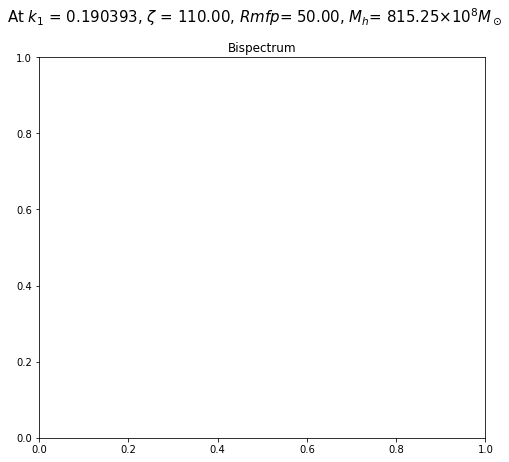

In [16]:
interact(plot,N_ion=(20,200,10),R_mfp = (10,100,10),NoH=(10,1500,20))

In [17]:
Bk_test = np.zeros(shape=(len(Bk_02_test),11,50))
Bk_pdct = np.zeros(shape=(len(Bk_02_pdct),11,50))
for i in range(len(Bk_02_test)):
    Bk_pdct[i] = Bk_02_pdct[i].reshape(11,50)
    Bk_test[i] = Bk_02_test[i].reshape(11,50)

Bk_pdct = Bk_pdct*10000
Bk_test = Bk_test

In [18]:
cond = k2byk1*cosalpha


In [19]:
cond = k2byk1*cosalpha
for i in range(len(Bk_test)):
    for j in range(len(k2byk1)):
        for k in range(len(cosalpha)):
            if cond[j][k] < 0.5:
                Bk_pdct[i][j][k] = np.nan
                Bk_test[i][j][k] = np.nan

Bk_pdct = np.ma.masked_invalid(Bk_pdct)
Bk_test = np.ma.masked_invalid(Bk_test)

In [20]:
def plot(test_set):
    index = test_set
    plt.figure(figsize= (16,6))
    plt.tick_params(labelsize=10)

    #fig.colorbar(pcm, ax=ax[0], extend='both')
    plt.suptitle(r'At $k_1$ = {0:f},$x_H$ = {1:.3f}, $\zeta$ = {2:.2f}, $Rmfp$= {3:.2f}, $M_h$= {4:.2f}$\times 10^8 M_\odot$'
                 .format(k1[0],x_H1_test[index],params_test[index][0] , params_test[index][1] ,1.087*params_test[index][2]),size=15)
    
   
    plt.subplot(1,2,1)
    plt.title('Bispectrum')
    plt.imshow(Bk_test[index],origin='lower',extent=[0.50,0.99,0.50,1.00], cmap="Spectral",)#norm=colors.SymLogNorm(linthresh=1, linscale=1,
                                                                                                                  #vmin=-10000.0, vmax=10000.0))
    #plt.plot(cosalpha,Bk_test[index][-1],'.-')
    cbar = plt.colorbar(label=r"$\frac{k_1^3.k_2^3.B(k_1,k_2,k_3).\delta T_b^3}{(2\pi^2)^2}$",)
    cbar.ax.yaxis.label.set_size(20,)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$')   
    
    plt.subplot(1,2,2)
    plt.title('ANN prediction')
    plt.imshow(Bk_pdct[index],origin='lower',extent=[0.50,0.99,0.50,1.00], cmap="Spectral",)#norm=colors.SymLogNorm(linthresh=1, linscale=1,
                   #vmin=-10000.0, vmax=10000.0))
    #plt.plot(cosalpha,Bk_pdct[index][-1],'.-')
    cbar = plt.colorbar(label=r"$\frac{k_1^3.k_2^3.B(k_1,k_2,k_3).\delta T_b^3}{(2\pi^2)^2}$",)
    cbar.ax.yaxis.label.set_size(20,)
    plt.ylabel(r'$k_2/k_1$') 
    plt.xlabel(r'$cos(\alpha)$')
    
  

            

<function __main__.plot(test_set)>

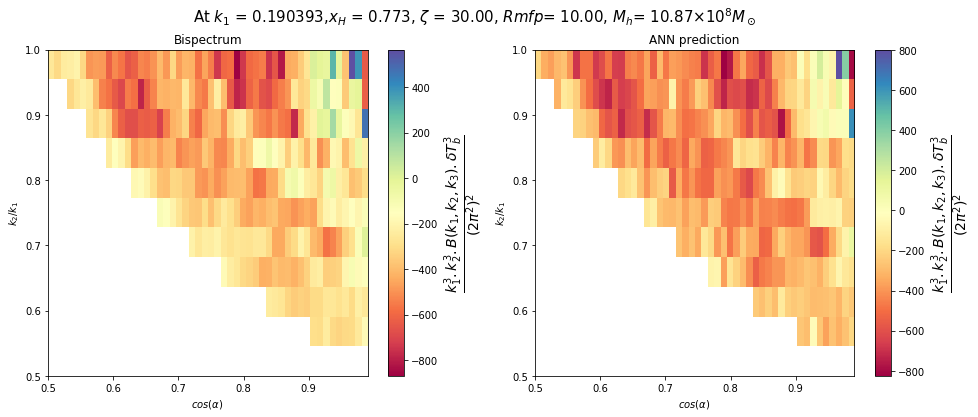

In [21]:
interact(plot,test_set=(0,17,1))

In [32]:
Bk_pdct = np.around(Bk_pdct,1)

In [50]:
def plot(test_set,i):
        i = int(i)
        index = int(test_set)
        #plt.ylim(-10000,10000)
        BB = Bk_test[index][i]
        BP = Bk_pdct[index][i]
        plt.plot(cosalpha,BB,'.-',label = 'real')
        plt.plot(cosalpha,BP,'.-',label='pred')
        BD = np.subtract(BB,BP)
        plt.plot(cosalpha,BD,'.-',label='diff',)
        plt.legend(loc='upper left')
        

In [51]:
Bk_test[0][1],Bk_pdct[0][1]


(masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    1269.3, 1887.5, 1905.4, 1182.6, 349.0, 463.0, 2078.7,
                    2620.5, 2965.9],
              mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True, False, False, False, False, False, False, False,
                    False, False],
        fill_value=1e+20),
 masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,

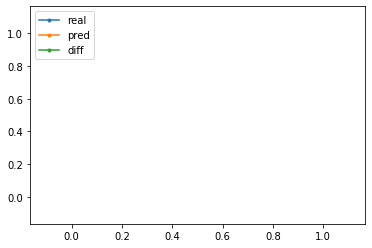

In [52]:
interact(plot, test_set =(0,len(Bk_test)-1,1),i=(0,10,1))

In [36]:
Bk_test[0][1],Bk_pdct[0,1],

(masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    1269.3, 1887.5, 1905.4, 1182.6, 349.0, 463.0, 2078.7,
                    2620.5, 2965.9],
              mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,  True,
                     True, False, False, False, False, False, False, False,
                    False, False],
        fill_value=1e+20),
 masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,

In [43]:

diff

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --,
                   -121.0, -70.09999999999991, -286.9000000000001, -153.0,
                   -2.8999999999999773, -132.0, -100.0,
                   -62.59999999999991, -115.09999999999991],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20)

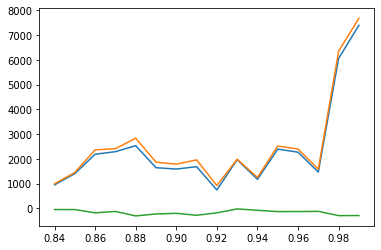

In [46]:
plt.plot(cosalpha,Bk_test[0][2])
plt.plot(cosalpha,Bk_pdct[0][2])
diff = np.subtract(Bk_test[0,2],Bk_pdct[0,2],)
plt.plot(cosalpha,diff)

In [ ]:
import cPickle as cp
import numpy as np

In [ ]:
Ntbins02 = cp.load(open('N0.2.pkl','rb'))
Ntbins03 = cp.load(open('N0.3.pkl','rb'))
Ntbins15 = cp.load(open('N15.pkl','rb'))
Bk = cp.load(open('Bispec0.2.pkl','rb'))

In [ ]:
Ntbins02.shape,Ntbins03.shape,Ntbins15.shape,Bk.shape

In [ ]:
a = np.argwhere(np.isnan(Bk))
a= a[:,0]
a = set(a)
a = list(a)
a

In [ ]:
Ntbins02 = np.delete(Ntbins02,a,axis = 0)
Ntbins03 = np.delete(Ntbins03,a,axis = 0)
Ntbins15 = np.delete(Ntbins15,a,axis = 0)
Bk = np.delete(Bk,a,axis=0)

In [ ]:
Ntbins02,Ntbins03,Ntbins15

In [ ]:
rootN = np.sqrt(Ntbins02)

In [ ]:
sigma = np.zeros(shape=Bk.shape)
for i in range(len(Bk)):

    sigma[i] = Bk[i]*1./rootN[i]

In [ ]:
sigma

In [ ]:
b = (Bk_pdct-Bk_test)/Bk_test
b = np.around(b,2)
a = b[18]
a = np.average(a)
a